In [766]:
#import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from category_encoders import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression,Perceptron,SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

In [378]:
#load dataset csv as a dataframe
df=pd.read_csv("train.csv")

#see the 1st 5 rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [358]:
#type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [359]:
#statistic of the numerical columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [361]:
#passengers:
print("Total number of passengers:", len(df))
print("total number of passengers who survived:",len(df[df['Survived']==1]))
print("total number of passengers who dies:",len(df[df['Survived']==0]))
print("% of passengers who survived:",round(len(df[df['Survived']==1])/len(df)*100,2),'%')

Total number of passengers: 891
total number of passengers who survived: 342
total number of passengers who dies: 549
% of passengers who survived: 38.38 %


In [444]:
#men or female survived:
print("% of men passengers who survived:",round((len(df[(df['Survived']==1)&(df['Sex']=='male')])/len(df))*100,2),'%')
print("% of women passengers who survived:",round((len(df[(df['Survived']==1)&(df['Sex']=='female')])/len(df))*100,2),'%')
print('\n')
#men or female survived:
print("% of men passengers who no survived:",round((len(df[(df['Survived']==0)&(df['Sex']=='male')])/len(df))*100,2),'%')
print("% of women passengers who no survived:",round((len(df[(df['Survived']==0)&(df['Sex']=='female')])/len(df))*100,2),'%')

print('\n')
#men or female survived:
print("% of  passengers who no survived:",round((len(df[(df['Survived']==0)])/len(df))*100,2),'%')
print("% of  passengers who  survived:",round((len(df[(df['Survived']==1)])/len(df))*100,2),'%')

% of men passengers who survived: 12.23 %
% of women passengers who survived: 26.15 %


% of men passengers who no survived: 52.53 %
% of women passengers who no survived: 9.09 %


% of  passengers who no survived: 61.62 %
% of  passengers who  survived: 38.38 %


In [365]:
#class and survived:
print("% of passengers whos survived in 1st class:",round((len(df[(df['Survived']==1)&(df['Pclass']==1)])/len(df))*100,2),'%')
print("% of passengers whos survived in 2nd class:",round((len(df[(df['Survived']==1)&(df['Pclass']==2)])/len(df))*100,2),'%')
print("% of passengers whos survived in 3rd class:",round((len(df[(df['Survived']==1)&(df['Pclass']==3)])/len(df))*100,2),'%')

% of passengers whos survived in 1st class: 15.26 %
% of passengers whos survived in 2nd class: 9.76 %
% of passengers whos survived in 3rd class: 13.36 %


In [366]:
#children and adults:
print("% of children who survived :",round((len(df[(df['Survived']==1)&(df['Age']<18)])/len(df))*100,2),'%')
print("% of adults who survived :",round((len(df[(df['Survived']==1)&(df['Age']>=18)])/len(df))*100,2),'%')

% of children who survived : 6.85 %
% of adults who survived : 25.7 %


In [449]:
#(female, male) and its classes:

print("% of women passengers who survived  in 1st:",round((len(df[(df['Survived']==1)&(df['Sex']=='female')&(df['Pclass']==1)])/len(df))*100,2),'%')
print("% of women passengers who survived  in 2nd:",round((len(df[(df['Survived']==1)&(df['Sex']=='female')&(df['Pclass']==2)])/len(df))*100,2),'%')
print("% of women passengers who survived  in 3rd:",round((len(df[(df['Survived']==1)&(df['Sex']=='female')&(df['Pclass']==3)])/len(df))*100,2),'%')
print('\n')

print("% of men passengers who survived  in 1st:",round((len(df[(df['Survived']==1)&(df['Sex']=='male')&(df['Pclass']==1)])/len(df))*100,2),'%')
print("% of men passengers who survived  in 2nd:",round((len(df[(df['Survived']==1)&(df['Sex']=='male')&(df['Pclass']==2)])/len(df))*100,2),'%')
print("% of men passengers who survived  in 3rd:",round((len(df[(df['Survived']==1)&(df['Sex']=='male')&(df['Pclass']==3)])/len(df))*100,2),'%')
print('\n')

% of women passengers who survived  in 1st: 10.21 %
% of women passengers who survived  in 2nd: 7.86 %
% of women passengers who survived  in 3rd: 8.08 %


% of men passengers who survived  in 1st: 5.05 %
% of men passengers who survived  in 2nd: 1.91 %
% of men passengers who survived  in 3rd: 5.27 %




In [380]:
#distribution of values in the column
df['Sex'].value_counts(dropna=False)

Sex
male      577
female    314
Name: count, dtype: int64

In [384]:
#mean surb=vival
df[['Sex','Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [383]:
#to sum in every columns the rows and check the null values 
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

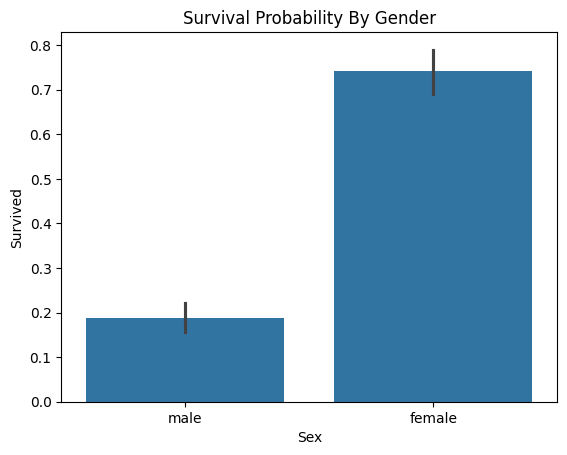

In [398]:
#female, male
sns.barplot(x='Sex', y='Survived', data = df)
plt.title('Survival Probability By Gender')
plt.show()

In [394]:
#values count Pclass
df['Pclass'].value_counts(dropna=False)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [395]:
#mean
df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


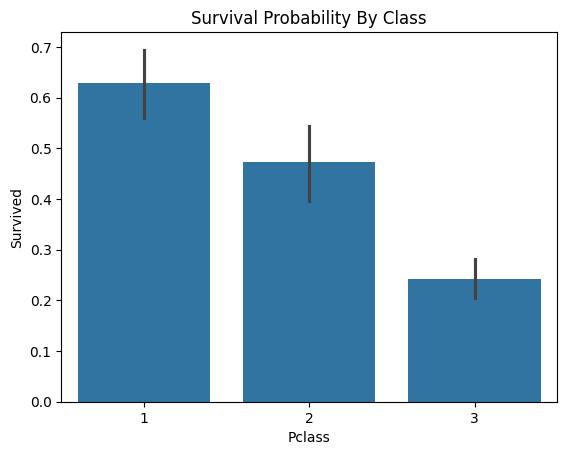

In [397]:
#Pclass 
sns.barplot(x='Pclass', y='Survived', data = df)
plt.title('Survival Probability By Class')
plt.show()

Text(0.5, 1.0, 'Survival probability by Sex and Passenger Class')

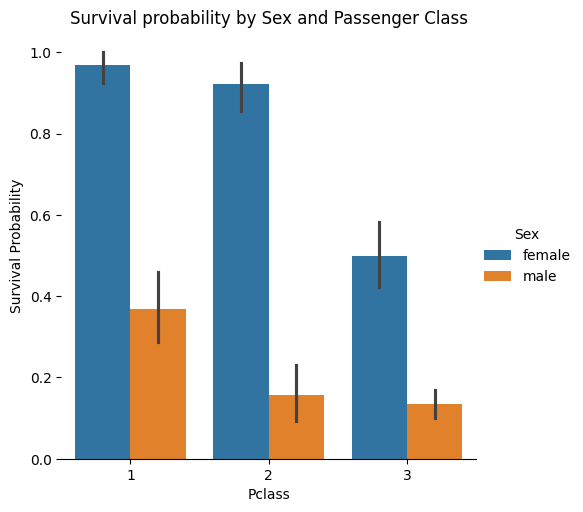

In [409]:
g=sns.catplot(x='Pclass',y='Survived', hue='Sex', data=df, kind='bar')
g.despine(left=True)
plt.ylabel('Survival Probability')
plt.title('Survival probability by Sex and Passenger Class')

In [403]:
#values count Pclass
df['Embarked'].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [404]:
#mean
df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


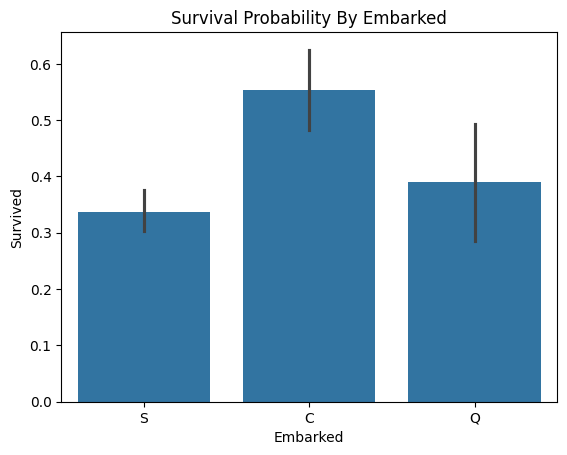

In [405]:
#Embarked 
sns.barplot(x='Embarked', y='Survived', data = df)
plt.title('Survival Probability By Embarked')
plt.show()

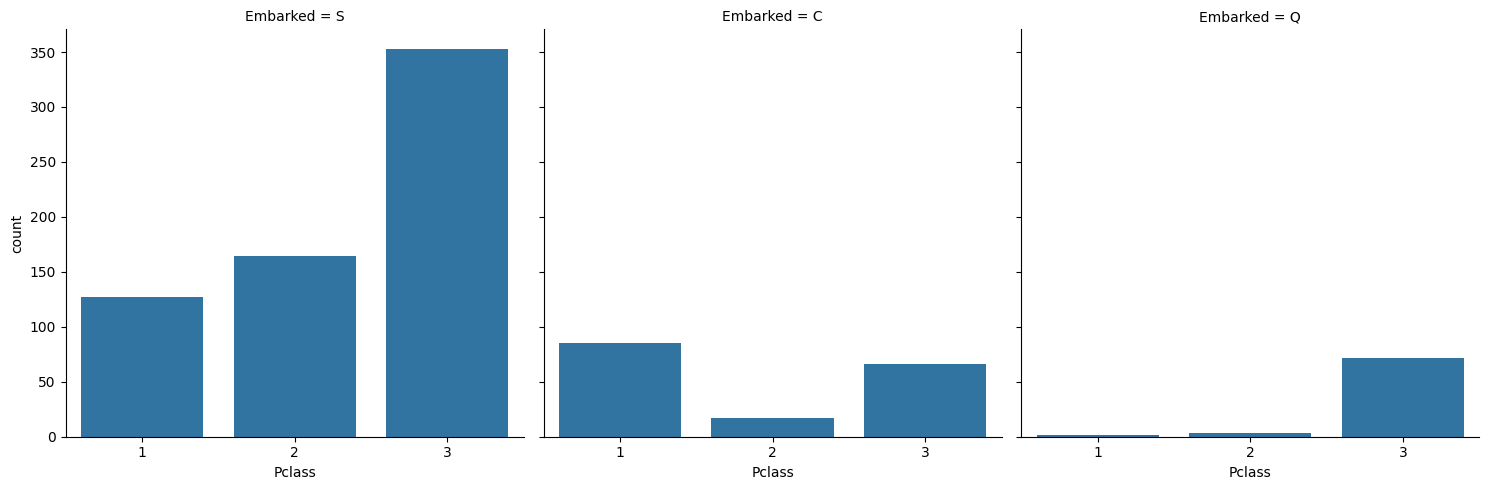

In [411]:
sns.catplot(x='Pclass',col='Embarked',data=df, kind='count')
plt.show()

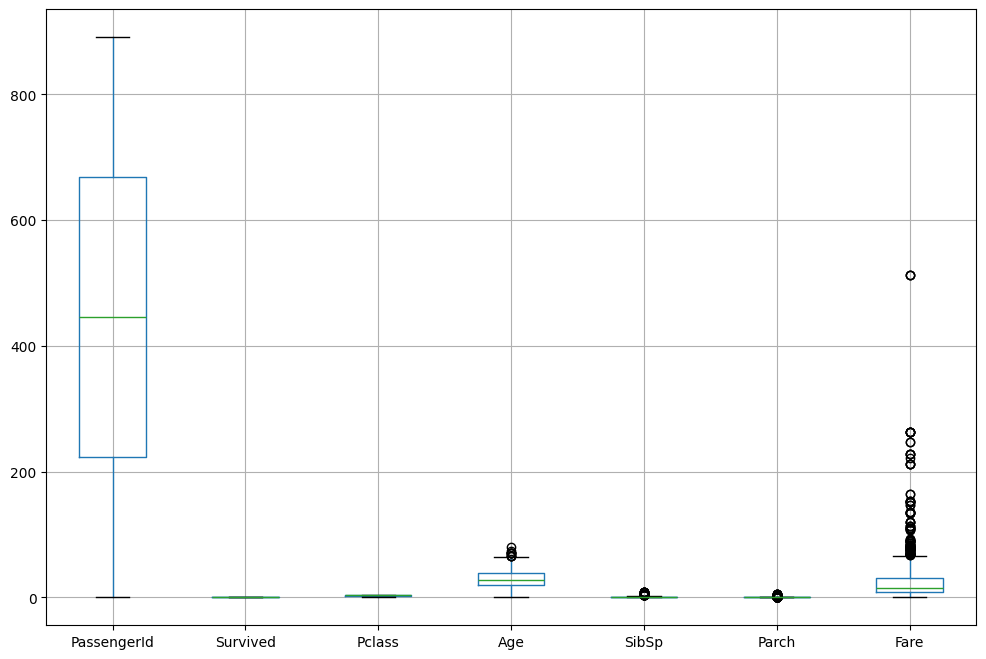

In [604]:
#find outliers: using the boxplot and the IQR METHOD(25%-75%)
df2=df.copy()
plt.figure(figsize=(12,8))
df2.boxplot()
plt.show()

In [605]:
def outlier_limits(df2,col):
    Q3=df2[col].quantile(0.75)#it is  to find in the column specified the 75% of the data
    Q1=df2[col].quantile(0.25)#it is  to find in the column specified the 25% of the data
    IQR=Q3-Q1
    UL=Q3+1.5*IQR#upper limit
    LL=Q1-1.5*IQR#lower limit
    return df2[(df2[col]<=UL) & (df2[col]>=LL)]    

In [606]:
for column in df2.columns:#to pass all the columns
    if df2[column].dtype !='object':#to not enter object datatype
        df3=outlier_limits(df2,column)
        

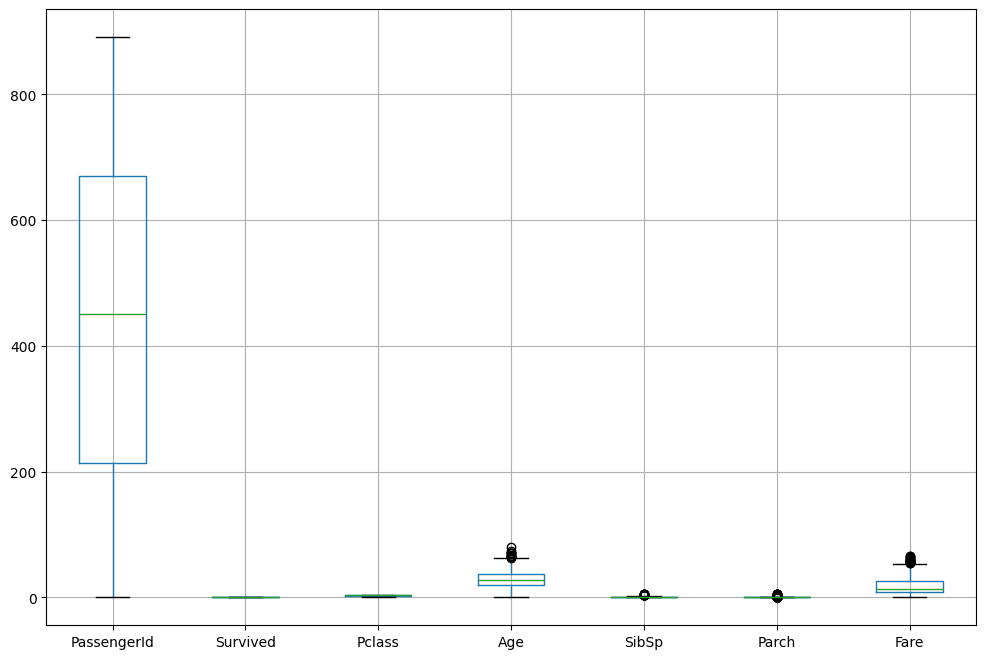

In [607]:
plt.figure(figsize=(12,8))
df3.boxplot()
plt.show()

In [608]:
#after removing outlier:
print("before: {} rows". format(len(df2)))
print("after: {} rows". format(len(df3)))


before: 891 rows
after: 775 rows


<Axes: >

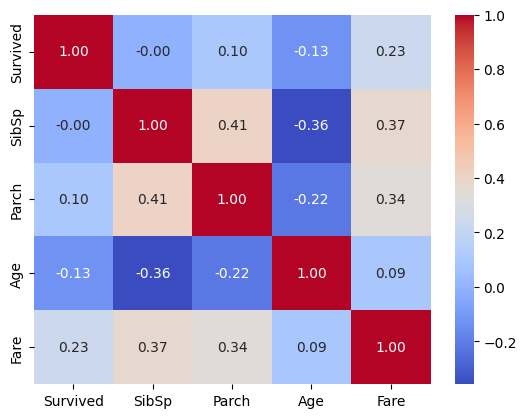

In [609]:
#correlation with survival
sns.heatmap(df3[['Survived','SibSp','Parch','Age','Fare']].corr(), annot=True, fmt='.2f',cmap='coolwarm')

In [611]:
df3['SibSp'].value_counts(dropna=False)

SibSp
0    557
1    161
2     21
4     18
3     13
5      5
Name: count, dtype: int64

In [612]:
df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


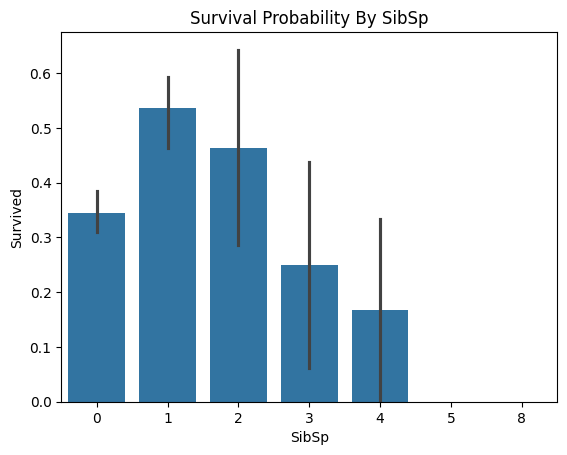

In [613]:
#Pclass 
sns.barplot(x='SibSp', y='Survived', data = df)
plt.title('Survival Probability By SibSp')
plt.show()

In [617]:
df['Parch'].value_counts(dropna=False)

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [618]:
df3[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.530612
2,2,0.481481
0,0,0.297209
5,5,0.200000
4,4,0.000000
6,6,0.000000


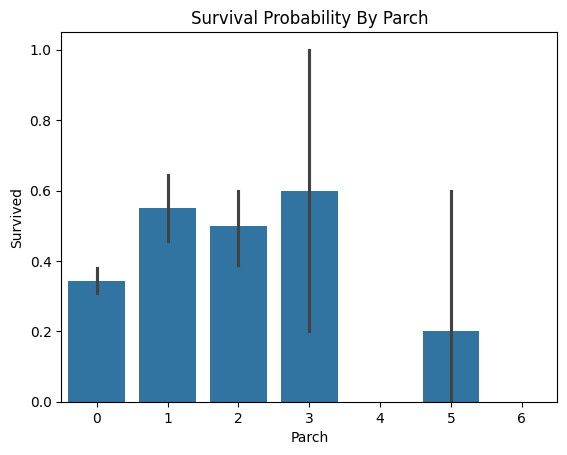

In [619]:
#SibSp 
sns.barplot(x='Parch', y='Survived', data = df)
plt.title('Survival Probability By Parch')
plt.show()

In [620]:
df3.isnull().sum().sort_values(ascending=False)

Cabin          661
Age            162
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

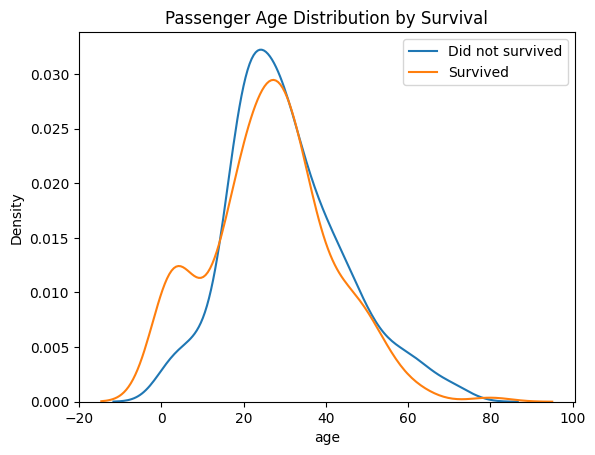

In [621]:
sns.kdeplot(df3['Age'][df3['Survived']==0],label='Did not survived')
sns.kdeplot(df3['Age'][df3['Survived']==1],label='Survived')
plt.xlabel('age')
plt.title('Passenger Age Distribution by Survival')
plt.legend()
plt.show()

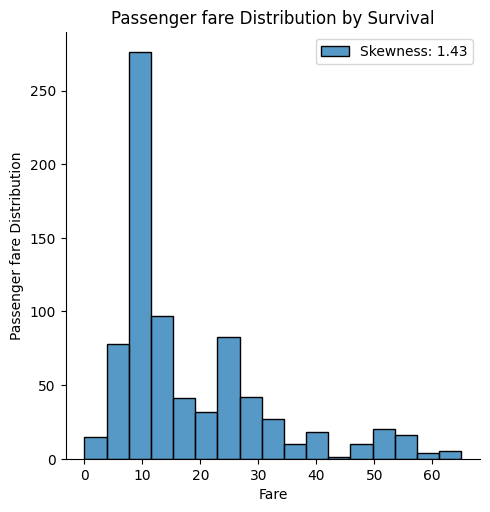

In [622]:
sns.displot(df3['Fare'],label='Skewness: %.2f'%(df3['Fare'].skew()))

plt.title('Passenger fare Distribution by Survival')
plt.legend(loc='best')
plt.ylabel('Passenger fare Distribution')
plt.show()

In [623]:
#drop feautures
df3.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26328\3663773423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(['Cabin', 'Ticket'], axis=1, inplace=True)


In [624]:
#to sum in every columns the rows and check the null values 
df3.isnull().sum().sort_values(ascending=False)

Age            162
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [626]:
df3['Embarked'].value_counts()

Embarked
S    584
C    116
Q     75
Name: count, dtype: int64

In [627]:
df3['Embarked'].fillna('S', inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26328\2080187135.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['Embarked'].fillna('S', inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26328\2080187135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Embarked'].fillna('S', inplace=True)


In [575]:
#to sum in every columns the rows and check the null values 
df3.isnull().sum().sort_values(ascending=False)

Cabin          661
Age            162
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [628]:
#change categorical values to numerical values

m={'female':1, 'male':0}
df3['Sex'] = df3['Sex'].map(m)

df3.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26328\4278516105.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Sex'] = df3['Sex'].map(m)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,8.4583,Q


In [629]:
#numerical columns, we will apply the mean approach
#age mean for each pclass

def fill_in_na_values(cols):
    age = cols.iloc[0]
    pclass = cols.iloc[1]

    if pd.isnull(age):
        if pclass == 1:
            return round(df3[df3['Pclass'] == 1]['Age'].mean(), 2)  # Assuming 2 decimal places for float
        elif pclass  == 2:
            return round(df3[df3['Pclass'] == 2]['Age'].mean(), 2)
        elif pclass == 3:
            return round(df3[df3['Pclass'] == 3]['Age'].mean(), 2)
    else:
        return round(age)

df3.loc[:,'Age'] = df3[['Age','Pclass']].apply(fill_in_na_values, axis=1)
df3.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.00,1,0,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",1,26.00,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.00,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.00,0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",0,25.14,0,0,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.00,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.00,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.00,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.00,1,0,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.00,1,1,16.7000,S


In [630]:
#to sum in every columns the rows and check the null values 
df3.isnull().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [631]:
#data transformation
df3['Fare']=df3['Fare'].map(lambda x:np.log(x) if x>0 else 0)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26328\36001182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Fare']=df3['Fare'].map(lambda x:np.log(x) if x>0 else 0)


Text(0.5, 1.0, 'Passenger fare distribution after log trans')

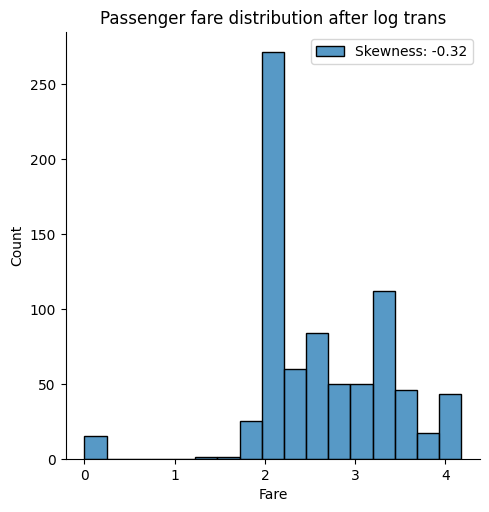

In [632]:
sns.displot(df3['Fare'], label='Skewness: %.2f'%(df3['Fare'].skew()))
plt.legend(loc='best')
plt.title('Passenger fare distribution after log trans')

In [633]:
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.00,1,0,1.981001,S
2,3,1,3,"Heikkinen, Miss. Laina",1,26.00,0,0,2.070022,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.00,1,0,3.972177,S
4,5,0,3,"Allen, Mr. William Henry",0,35.00,0,0,2.085672,S
5,6,0,3,"Moran, Mr. James",0,25.14,0,0,2.135148,Q


In [634]:
#feauture eng:

#title:
df3['Title']=[name.split(',')[1].split('.')[0].strip() for name in df3['Name']]
df3[['Name','Title']].head()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26328\1471112986.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Title']=[name.split(',')[1].split('.')[0].strip() for name in df3['Name']]


,Name,Title
0,"Braund, Mr. Owen Harris",Mr
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr
5,"Moran, Mr. James",Mr


In [635]:
df3['Title'].value_counts()

Title
Mr          478
Miss        143
Mrs          97
Master       36
Rev           6
Dr            5
Major         2
Col           2
Don           1
Ms            1
Lady          1
Sir           1
Mlle          1
Jonkheer      1
Name: count, dtype: int64

In [636]:
df3['Title']=df3['Title'].replace(['Dr','Rev','Col','Major','Jonkeer','Don','Capt','the Countess','Dona', 'Master'],'Rare')
df3['Title']=df3['Title'].replace(['Mlle','Ms','Lady'],'Miss')
df3['Title']=df3['Title'].replace(['Mme'],'Mrs')
df3['Title']=df3['Title'].replace(['Sir'],'Mr')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26328\1998877978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Title']=df3['Title'].replace(['Dr','Rev','Col','Major','Jonkeer','Don','Capt','the Countess','Dona', 'Master'],'Rare')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26328\1998877978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Title']=df3['Title'].replace(['Mlle','Ms','Lady'],'Miss')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26328\1998877978.py:3: SettingWithCopyWarning: 
A va

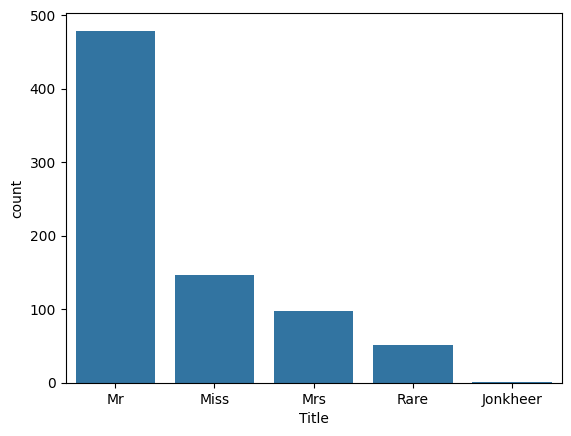

In [637]:
sns.countplot(x=df3['Title'])
plt.show()

In [638]:
df3[['Title','Survived']].groupby(['Title'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,Mrs,0.742268
1,Miss,0.650685
4,Rare,0.461538
2,Mr,0.150313
0,Jonkheer,0.000000


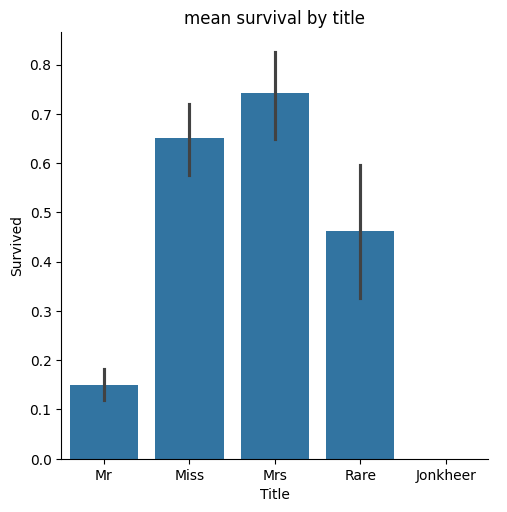

In [639]:
sns.catplot(x='Title',y='Survived',data=df3, kind='bar')
plt.title('mean survival by title')
plt.show()

In [640]:
df3=df3.drop('Name',axis=1)
df3.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.00,1,0,1.981001,S,Mr
2,3,1,3,1,26.00,0,0,2.070022,S,Miss
3,4,1,1,1,35.00,1,0,3.972177,S,Mrs
4,5,0,3,0,35.00,0,0,2.085672,S,Mr
5,6,0,3,0,25.14,0,0,2.135148,Q,Mr


In [641]:
#isalone feauture:
df3['FamilySize']=df3['SibSp']+df3['Parch']+1
df3[['SibSp','Parch','FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2
10,1,1,3


In [642]:
df3[['FamilySize','Survived']].groupby('FamilySize', as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.727273
2,3,0.575000
1,2,0.487603
6,7,0.333333
0,1,0.270378
4,5,0.076923
5,6,0.055556
7,8,0.000000


In [643]:
df3['IsAlone']=0
df3.loc[df3['FamilySize']==1,'IsAlone']=1

In [644]:
df3[['IsAlone','Survived']].groupby('IsAlone', as_index=False).mean().sort_values(by='Survived',ascending=False)

,IsAlone,Survived
0,0,0.466912
1,1,0.270378


In [645]:
df3=df3.drop(['SibSp','Parch','FamilySize'],axis=1)

In [646]:

df3.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,0,22.00,1.981001,S,Mr,0
2,3,1,3,1,26.00,2.070022,S,Miss,1
3,4,1,1,1,35.00,3.972177,S,Mrs,0
4,5,0,3,0,35.00,2.085672,S,Mr,1
5,6,0,3,0,25.14,2.135148,Q,Mr,1


In [647]:
df3['Age_band']=pd.cut(df3['Age'],5)
df3[['Age_band','Survived']].groupby('Age_band',as_index=False).mean().sort_values(by='Age_band')


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26328\323079103.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3[['Age_band','Survived']].groupby('Age_band',as_index=False).mean().sort_values(by='Age_band')


,Age_band,Survived
0,"(-0.08, 16.0]",0.526882
1,"(16.0, 32.0]",0.315436
2,"(32.0, 48.0]",0.322034
3,"(48.0, 64.0]",0.312500
4,"(64.0, 80.0]",0.100000


In [648]:
##new feauture
#should be age ranges
df3.loc[df3['Age']<=16.0,'Age']=0
df3.loc[(df3['Age']>16.0) & (df3['Age']<=32.0),'Age']=1
df3.loc[(df3['Age']>32.0) & (df3['Age']<=48.0),'Age']=2
df3.loc[(df3['Age']>48.0)& (df3['Age']<=64.0),'Age']=3
df3.loc[(df3['Age']>64.0),'Age']=4

In [649]:
df3=df3.drop('Age_band', axis=1)


In [650]:
df3['Age']=df3['Age'].astype('int')

In [651]:
df3.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,0,1,1.981001,S,Mr,0
2,3,1,3,1,1,2.070022,S,Miss,1
3,4,1,1,1,2,3.972177,S,Mrs,0
4,5,0,3,0,2,2.085672,S,Mr,1
5,6,0,3,0,1,2.135148,Q,Mr,1


In [652]:
df3.loc[:,'Age*Class']=(df3['Age']*df3['Pclass'])

In [653]:
df3['Age*Class']=df3['Age*Class'].astype('int')

In [654]:
df3.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0,3,0,1,1.981001,S,Mr,0,3
2,3,1,3,1,1,2.070022,S,Miss,1,3
3,4,1,1,1,2,3.972177,S,Mrs,0,2
4,5,0,3,0,2,2.085672,S,Mr,1,6
5,6,0,3,0,1,2.135148,Q,Mr,1,3


In [655]:
#feauture encoding:
enc_df=OneHotEncoder(df3["Embarked"],use_cat_names=True)
hot=enc_df.fit_transform(df3["Embarked"])
df3 = pd.concat([df3, hot], axis=1)


In [658]:
df3=df3.drop('Embarked', axis=1)

In [659]:
df3.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Title,IsAlone,Age*Class,Embarked_S,Embarked_Q,Embarked_C
0,1,0,3,0,1,1.981001,Mr,0,3,1,0,0
2,3,1,3,1,1,2.070022,Miss,1,3,1,0,0
3,4,1,1,1,2,3.972177,Mrs,0,2,1,0,0
4,5,0,3,0,2,2.085672,Mr,1,6,1,0,0
5,6,0,3,0,1,2.135148,Mr,1,3,0,1,0


In [660]:
enc_df1=OneHotEncoder(df3["Title"],use_cat_names=True)
hot1=enc_df1.fit_transform(df3["Title"])
df3 = pd.concat([df3, hot1], axis=1)

In [662]:
df3=df3.drop('Title', axis=1)

In [663]:
df3.head()
        

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Embarked_S,Embarked_Q,Embarked_C,Title_Mr,Title_Miss,Title_Mrs,Title_Rare,Title_Jonkheer
0,1,0,3,0,1,1.981001,0,3,1,0,0,1,0,0,0,0
2,3,1,3,1,1,2.070022,1,3,1,0,0,0,1,0,0,0
3,4,1,1,1,2,3.972177,0,2,1,0,0,0,0,1,0,0
4,5,0,3,0,2,2.085672,1,6,1,0,0,1,0,0,0,0
5,6,0,3,0,1,2.135148,1,3,0,1,0,1,0,0,0,0


In [665]:
df3['Fare_band']=pd.cut(df3['Fare'],4)
df3[['Fare_band','Survived']].groupby('Fare_band',as_index=False).mean().sort_values(by='Fare_band')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26328\3430917439.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3[['Fare_band','Survived']].groupby('Fare_band',as_index=False).mean().sort_values(by='Fare_band')


,Fare_band,Survived
0,"(-0.00417, 1.044]",0.066667
1,"(1.044, 2.087]",0.211111
2,"(2.087, 3.131]",0.370079
3,"(3.131, 4.174]",0.470339


In [666]:
#should the Fare in ranges
df3.loc[df3['Fare']<=1.044,'Fare']=1
df3.loc[(df3['Fare']>1.044) & (df3['Fare']<=2.087),'Fare']=2
df3.loc[(df3['Fare']>2.087) & (df3['Fare']<=3.131),'Fare']=3
df3.loc[(df3['Fare']>3.131),'Fare']=4



In [667]:
df3=df3.drop('Fare_band', axis=1)

In [668]:
df3['Fare']=df3['Fare'].astype('int')

In [669]:
df3.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Embarked_S,Embarked_Q,Embarked_C,Title_Mr,Title_Miss,Title_Mrs,Title_Rare,Title_Jonkheer
0,1,0,3,0,1,2,0,3,1,0,0,1,0,0,0,0
2,3,1,3,1,1,2,1,3,1,0,0,0,1,0,0,0
3,4,1,1,1,2,4,0,2,1,0,0,0,0,1,0,0
4,5,0,3,0,2,2,1,6,1,0,0,1,0,0,0,0
5,6,0,3,0,1,3,1,3,0,1,0,1,0,0,0,0


In [670]:
df3=df3.drop('PassengerId', axis=1)

In [671]:
df3.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Embarked_S,Embarked_Q,Embarked_C,Title_Mr,Title_Miss,Title_Mrs,Title_Rare,Title_Jonkheer
0,0,3,0,1,2,0,3,1,0,0,1,0,0,0,0
2,1,3,1,1,2,1,3,1,0,0,0,1,0,0,0
3,1,1,1,2,4,0,2,1,0,0,0,0,1,0,0
4,0,3,0,2,2,1,6,1,0,0,1,0,0,0,0
5,0,3,0,1,3,1,3,0,1,0,1,0,0,0,0


In [673]:
#correlation matrix
corr2=df3.corr()
corr2

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Embarked_S,Embarked_Q,Embarked_C,Title_Mr,Title_Miss,Title_Mrs,Title_Rare,Title_Jonkheer
Survived,1.000000,-0.238532,0.499888,-0.103187,0.236181,-0.198104,-0.240341,-0.102337,0.032707,0.096513,-0.507888,0.316782,0.321863,0.069205,-0.025762
Pclass,-0.238532,1.000000,-0.011810,-0.419697,-0.579327,0.020481,0.217199,-0.054342,0.214080,-0.111770,0.032857,0.076077,-0.098612,-0.041882,-0.072484
Sex,0.499888,-0.011810,1.000000,-0.132487,0.193192,-0.333910,-0.132362,-0.095835,0.107002,0.027090,-0.862322,0.710728,0.557986,-0.170690,-0.024366
Age,-0.103187,-0.419697,-0.132487,1.000000,0.110730,0.229006,0.743766,0.085243,-0.089128,-0.029107,0.219985,-0.274806,0.130340,-0.174803,0.032786
Fare,0.236181,-0.579327,0.193192,0.110730,1.000000,-0.484588,-0.289065,0.060641,-0.183722,0.079002,-0.288632,0.023497,0.238434,0.220063,-0.081026
IsAlone,-0.198104,0.020481,-0.333910,0.229006,-0.484588,1.000000,0.252141,0.006055,0.076105,-0.070384,0.429092,-0.088214,-0.367300,-0.213414,0.026432
Age*Class,-0.240341,0.217199,-0.132362,0.743766,-0.289065,0.252141,1.000000,0.084596,0.033999,-0.130364,0.259069,-0.241719,0.099648,-0.254531,-0.018034
Embarked_S,-0.102337,-0.054342,-0.095835,0.085243,0.060641,0.006055,0.084596,1.000000,-0.572363,-0.733628,0.098912,-0.153285,0.044390,-0.014176,0.020556
Embarked_Q,0.032707,0.214080,0.107002,-0.089128,-0.183722,0.076105,0.033999,-0.572363,1.000000,-0.137331,-0.101997,0.199466,-0.084241,-0.000563,-0.011766
Embarked_C,0.096513,-0.111770,0.027090,-0.029107,0.079002,-0.070384,-0.130364,-0.733628,-0.137331,1.000000,-0.034954,0.019860,0.016191,0.017590,-0.015081


In [733]:
#split:

X=df3.drop('Survived', axis=1)
Y=df3['Survived']

X_train,X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42,stratify=Y)#20%test, 80%train 



In [734]:
X_train.shape

(620, 14)

In [735]:
Y_train.shape

(620,)

In [736]:
X_test.shape


(155, 14)

In [737]:
Y_test.shape

(155,)

In [738]:
#model
lr=LogisticRegression(random_state=42)

#train
lr.fit(X_train, Y_train)#fit(train) the data

#predict
lr_predictions=lr.predict(X_test)#give input

lr_acc=round(lr.score(X_train, Y_train)*100,2)
lr_acc

80.48

In [720]:
#predicting the model
print(lr_predictions)

[0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 1]


In [739]:
#data that we have truth
b=np.array(Y_test)
print(b.flatten())

[0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1
 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0
 1 0 0 0 1 0 1]


In [740]:

print(classification_report(Y_test,lr_predictions))


              precision    recall  f1-score   support

           0       0.84      0.86      0.85       102
           1       0.72      0.68      0.70        53

    accuracy                           0.80       155
   macro avg       0.78      0.77      0.77       155
weighted avg       0.80      0.80      0.80       155



In [741]:
#confusion matrix
print(confusion_matrix(Y_test,lr_predictions))


[[88 14]
 [17 36]]


In [744]:
#other classifier:

svc=SVC()
svc.fit(X_train,Y_train)
Y_pred1=svc.predict(X_test)
acc_svc=round(svc.score(X_train, Y_train)*100,2)
acc_svc

79.19

In [745]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_pred2=knn.predict(X_test)
acc_knn=round(knn.score(X_train,Y_train)*100,2)
acc_knn

84.03

In [746]:
gaussian=GaussianNB()
gaussian.fit(X_train,Y_train)
Y_pred3=gaussian.predict(X_test)
acc_gaussian=round(gaussian.score(X_train,Y_train)*100,2)
acc_knn

84.03

In [751]:
perceptron=Perceptron()
perceptron.fit(X_train,Y_train)
Y_pred4=perceptron.predict(X_test)
acc_perceptron=round(perceptron.score(X_train,Y_train)*100,2)
acc_perceptron

74.03

In [752]:
linear_svc=LinearSVC()
linear_svc.fit(X_train,Y_train)
Y_pred5=linear_svc.predict(X_test)
acc_linear_svc=round(linear_svc.score(X_train,Y_train)*100,2)
acc_linear_svc

C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


80.0

In [753]:
sgd=SGDClassifier()
sgd.fit(X_train,Y_train)
Y_pred6=sgd.predict(X_test)
acc_sgd=round(sgd.score(X_train,Y_train)*100,2)
acc_sgd

80.32

In [754]:
d_t=DecisionTreeClassifier()
d_t.fit(X_train,Y_train)
Y_pred7=d_t.predict(X_test)
acc_d_t=round(d_t.score(X_train,Y_train)*100,2)
acc_d_t

86.29

In [756]:
r_f=RandomForestClassifier(n_estimators=100)
r_f.fit(X_train,Y_train)
Y_pred8=r_f.predict(X_test)
acc_r_f=round(r_f.score(X_train,Y_train)*100,2)
acc_r_f

86.29

In [757]:
c_b=CatBoostClassifier()
c_b.fit(X_train,Y_train)
Y_pred9=c_b.predict(X_test)
acc_c_b=round(c_b.score(X_train,Y_train)*100,2)
acc_c_b

Learning rate set to 0.0084
0:	learn: 0.6873230	total: 147ms	remaining: 2m 27s
1:	learn: 0.6822104	total: 150ms	remaining: 1m 14s
2:	learn: 0.6775011	total: 152ms	remaining: 50.6s
3:	learn: 0.6725155	total: 155ms	remaining: 38.5s
4:	learn: 0.6679516	total: 157ms	remaining: 31.1s
5:	learn: 0.6635276	total: 158ms	remaining: 26.3s
6:	learn: 0.6587426	total: 160ms	remaining: 22.7s
7:	learn: 0.6543771	total: 162ms	remaining: 20.1s
8:	learn: 0.6511202	total: 164ms	remaining: 18.1s
9:	learn: 0.6469822	total: 166ms	remaining: 16.5s
10:	learn: 0.6432885	total: 168ms	remaining: 15.1s
11:	learn: 0.6392537	total: 171ms	remaining: 14s
12:	learn: 0.6355358	total: 173ms	remaining: 13.1s
13:	learn: 0.6313850	total: 175ms	remaining: 12.4s
14:	learn: 0.6275470	total: 178ms	remaining: 11.7s
15:	learn: 0.6231937	total: 180ms	remaining: 11.1s
16:	learn: 0.6198213	total: 182ms	remaining: 10.5s
17:	learn: 0.6158591	total: 184ms	remaining: 10s
18:	learn: 0.6125569	total: 186ms	remaining: 9.63s
19:	learn: 0.60

85.81

In [759]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree', 'CatBoost'],
                       'Score': [acc_svc, acc_knn, lr_acc, acc_r_f, acc_gaussian, acc_perceptron,
                                 acc_sgd, acc_linear_svc, acc_d_t, acc_c_b]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,86.29
1,Decision Tree,86.29
2,CatBoost,85.81
3,KNN,84.03
4,Logistic Regression,80.48
5,Stochastic Gradient Decent,80.32
6,Linear SVC,80.00
7,Support Vector Machines,79.19
8,Perceptron,74.03
9,Naive Bayes,40.16


In [760]:
# Create a list which contains classifiers 

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())

len(classifiers)

10

In [761]:
# Create a list which contains cross validation results for each classifier

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 10))

C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\si

Learning rate set to 0.008031
0:	learn: 0.6877767	total: 2.23ms	remaining: 2.23s
1:	learn: 0.6829931	total: 4.12ms	remaining: 2.06s
2:	learn: 0.6784843	total: 5.9ms	remaining: 1.96s
3:	learn: 0.6738927	total: 7.54ms	remaining: 1.88s
4:	learn: 0.6695575	total: 9.32ms	remaining: 1.85s
5:	learn: 0.6654641	total: 11.2ms	remaining: 1.85s
6:	learn: 0.6610383	total: 13.2ms	remaining: 1.87s
7:	learn: 0.6568405	total: 15.3ms	remaining: 1.9s
8:	learn: 0.6538214	total: 16.8ms	remaining: 1.85s
9:	learn: 0.6499196	total: 18.7ms	remaining: 1.85s
10:	learn: 0.6460501	total: 20.5ms	remaining: 1.84s
11:	learn: 0.6426865	total: 22.2ms	remaining: 1.82s
12:	learn: 0.6388212	total: 23.8ms	remaining: 1.81s
13:	learn: 0.6348158	total: 25.9ms	remaining: 1.82s
14:	learn: 0.6315307	total: 27.7ms	remaining: 1.82s
15:	learn: 0.6276686	total: 29.8ms	remaining: 1.83s
16:	learn: 0.6238121	total: 31.5ms	remaining: 1.82s
17:	learn: 0.6201421	total: 33.2ms	remaining: 1.81s
18:	learn: 0.6169577	total: 35ms	remaining: 1.

In [762]:
# Mean and standard deviation of cross validation results for each classifier  

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [774]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.811290,0.039541,Random Forest
1,0.808065,0.037097,KNN
2,0.804839,0.046439,CatBoost
3,0.800000,0.037619,Decision Tree
4,0.798387,0.040323,Logistic Regression
5,0.793548,0.045506,Linear SVC
6,0.772581,0.056544,Support Vector Machines
7,0.719355,0.089280,Stochastic Gradient Descent
8,0.703226,0.115905,Perceptron
9,0.456452,0.116543,Gausian Naive Bayes


In [775]:
#hyperparameter:
param_grid = {'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}  
rf_classifier = RandomForestClassifier()
grid = GridSearchCV(rf_classifier, param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train) 

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.823 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.815 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.823 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.847 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.734 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.847 total time=   0.1s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.831 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.831 t

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             verbose=3)

In [778]:
print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best estimator:  RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=50)


In [779]:
# Training accuracy

rf_classifier = RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=50)

# Fit the RandomForestClassifier to the training data
rf_classifier.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy for RandomForestClassifier
acc_rf = round(rf_classifier.score(X_train, Y_train) * 100, 2)
acc_svc

84.68

In [780]:
# Mean cross validation score

cross_val_score(rf_classifier, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()

0.8193548387096774

In [781]:
print(classification_report(Y_test,Y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       102
           1       0.77      0.70      0.73        53

    accuracy                           0.83       155
   macro avg       0.81      0.80      0.80       155
weighted avg       0.82      0.83      0.82       155

